# Simple Investment Forecasting Using Prior Data

## Imports

In [35]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")

## Load S&P500 Data

In [5]:
ticker = ["^GSPC"]

In [30]:
df_stocks = yf.download(ticker)
df_stocks.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,0


In [31]:
df_stocks.tail()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2025-01-14,5842.910156,5871.919922,5805.419922,5859.270020,4142280000
2025-01-15,5949.910156,5960.609863,5905.209961,5905.209961,4544570000
2025-01-16,5937.339844,5964.689941,5930.720215,5963.609863,4285810000
2025-01-17,5996.660156,6014.959961,5978.439941,5995.399902,4366830000
2025-01-21,6049.240234,6051.509766,6006.879883,6014.120117,4702920000


In [16]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24379 entries, 1927-12-30 to 2025-01-21
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^GSPC)   24379 non-null  float64
 1   (High, ^GSPC)    24379 non-null  float64
 2   (Low, ^GSPC)     24379 non-null  float64
 3   (Open, ^GSPC)    24379 non-null  float64
 4   (Volume, ^GSPC)  24379 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.1 MB


In [29]:
df_gscp = df_stocks.droplevel(level=1, axis=1)
df_gscp.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,0


In [32]:
df_gscp.tail()

Price,Close,High,Low,Open,Volume
Date,,,,,
2025-01-14,5842.910156,5871.919922,5805.419922,5859.270020,4142280000
2025-01-15,5949.910156,5960.609863,5905.209961,5905.209961,4544570000
2025-01-16,5937.339844,5964.689941,5930.720215,5963.609863,4285810000
2025-01-17,5996.660156,6014.959961,5978.439941,5995.399902,4366830000
2025-01-21,6049.240234,6051.509766,6006.879883,6014.120117,4702920000


In [66]:
gscp_close = df_gscp['Close'].resample('YE').last().to_frame()
gscp_close.head()

,Close
Date,
1927-12-31,17.660000
1928-12-31,24.350000
1929-12-31,21.450001
1930-12-31,15.340000
1931-12-31,8.120000


## Initial Vizualisation

<Axes: xlabel='Date'>

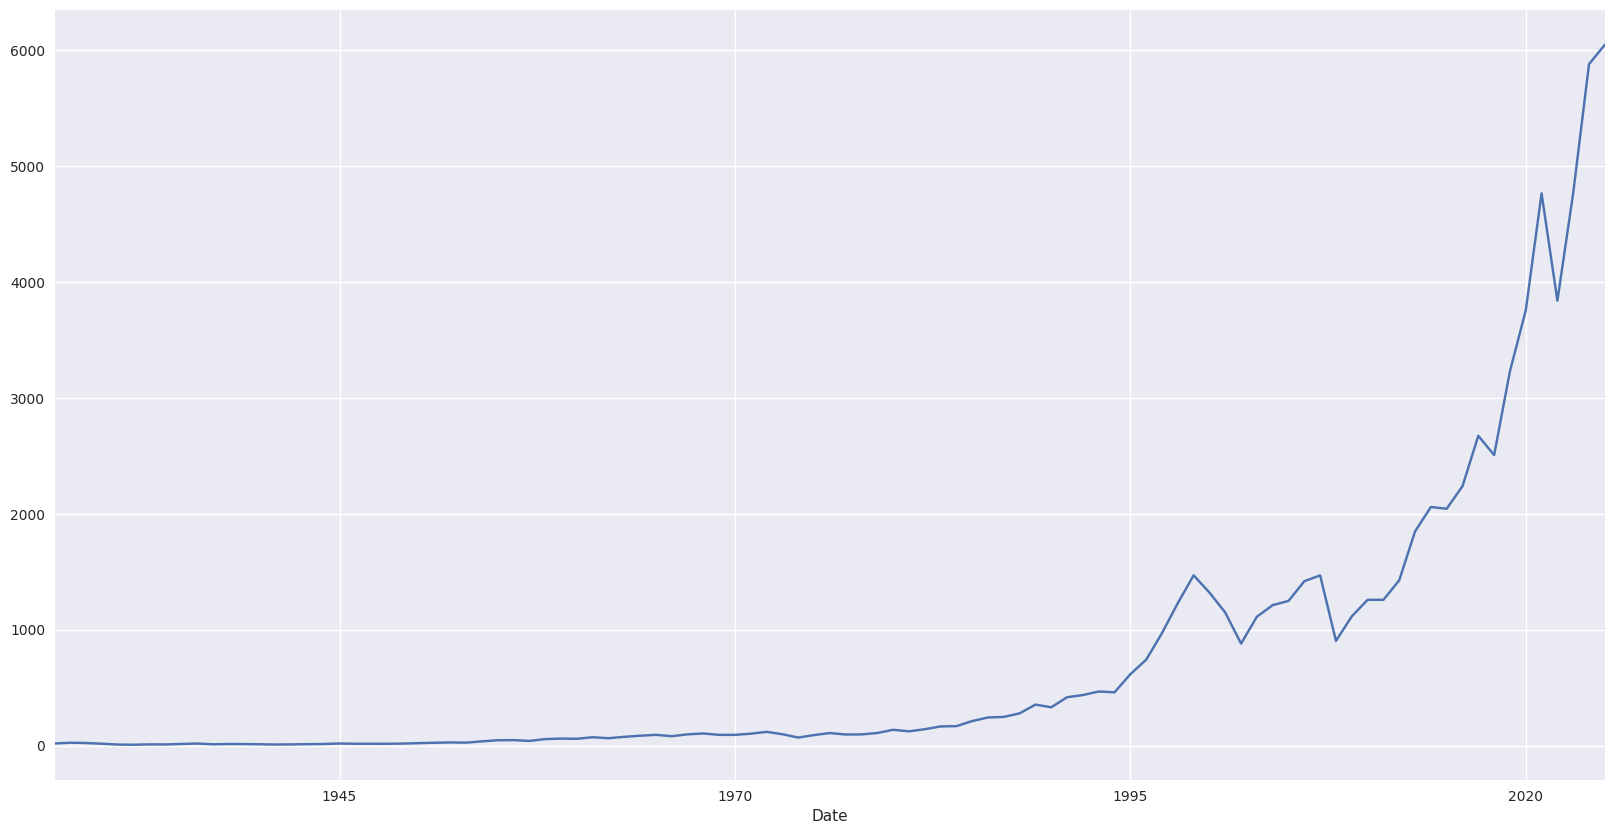

In [64]:
gscp_close.plot(figsize=(20,10))

In [67]:
gscp_close['pct_change'] = gscp_close['Close'].pct_change(periods=1).mul(100)
gscp_close.dropna(inplace=True)
gscp_close

,Close,pct_change
Date,,
1928-12-31,24.350000,37.882223
1929-12-31,21.450001,-11.909649
1930-12-31,15.340000,-28.484850
1931-12-31,8.120000,-47.066494
1932-12-31,6.920000,-14.778323
...,...,...
2021-12-31,4766.180176,26.892739
2022-12-31,3839.500000,-19.442827
2023-12-31,4769.830078,24.230501


<Axes: xlabel='Date'>

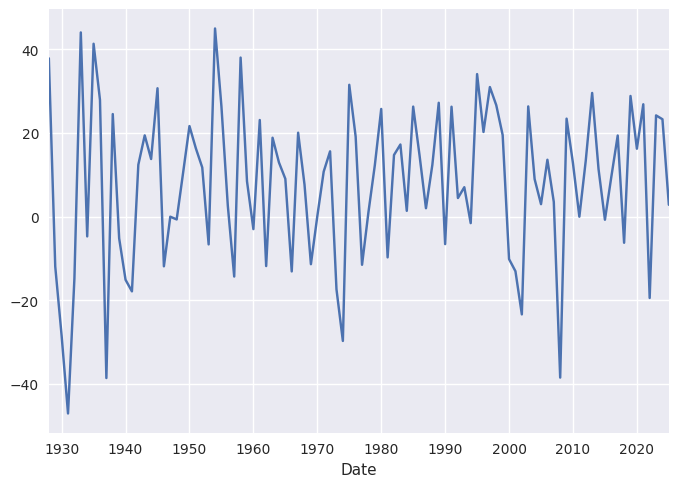

In [69]:
gscp_close['pct_change'].plot()

<Axes: ylabel='Frequency'>

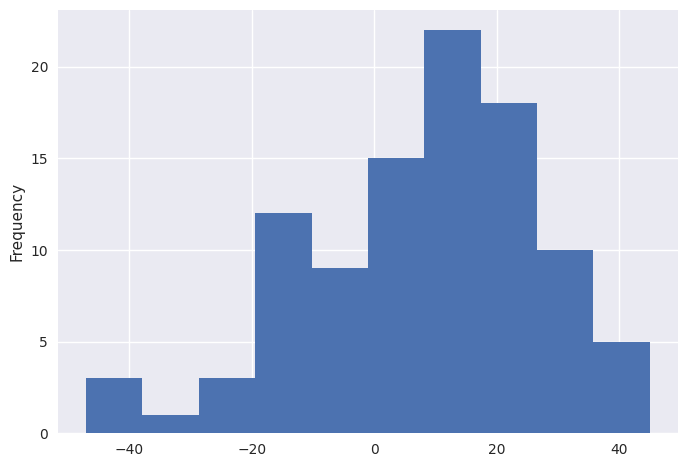

In [71]:
gscp_close['pct_change'].plot(kind='hist')

In [73]:
gscp_close['pct_change'].mean()

np.float64(7.958998193079571)